# week3


## 2D Fourier Transform

This is an introduction of continuous Fourier transform of a discrete signal and the DFT of a discrete signal. Convolution theorem will be covered, too. 
Let's consider an LSI System:
$$
x(n_1,n_2) = e^{j(\omega_1'n_1+\omega_2'n_1)} \rightarrow h(n_1,n_2) \rightarrow y(n_1,n_2)=?
$$

We know now that $y(n_1,n_2)=x(n_1,n_2)**h(n_1,n_2)$, which is equal to:
$$
y(n_1,n_2) = \sum\limits^{\infty}_{k_1=-\infty} \sum\limits^{\infty}_{k_2=-\infty} e^{j\omega_1'(n_1-k_1)} e^{j\omega_2'(n_2-k_2)} \cdot h(k_1,k_2) = e^{j\omega_1'n_1} e^{j\omega_2'n_2} \sum\limits^{\infty}_{k_1=-\infty} \sum\limits^{\infty}_{k_2=-\infty} e^{-j\omega_1'k_1} e^{-j\omega_2'k_2} \cdot h(k_1,k_2) = e^{j\omega_1'n_1} e^{j\omega_2'n_2} \cdot H(\omega_1,\omega_2)
$$

...meaning that outside it is a constant and inside the sums we have how the system responded to LSI and we see how. The output is the impulse response and $H(\omega_1,\omega_2)$ is the frequency response. Indeed we can write:
$$
X(\omega_1,\omega_2) = \sum\limits^{\infty}_{n_1=-\infty} \sum\limits^{\infty}_{n_2=-\infty} x(n_1,n_2) e^{-j\omega_1n_1} e^{-j\omega_2n_2}
$$

$$
x(n_1,n_2) = \frac{1}{4 \pi^2} \int^{\pi}_{-\pi} \int^{\pi}_{-\pi} X(\omega_1,\omega_2) e^{j\omega_1n_1} e^{j\omega_2n_2} d\omega_1 d\omega_2
$$

On top, we see that $X(\omega_1,\omega_2)$ is complex even if the image $x(n_1,n_2)$ is real. Some properties:
$$
X(\omega_1,\omega_2) = X(\omega_1+2\pi,\omega_2+2\pi) 
$$

$$
x(n_1-m_1,n_2-m_2) = e^{-j\omega_1m_1-j\omega_2m_2} X(\omega_1,\omega_2) 
$$

The following is called Modulation property:
$$
x(n_1,n_2)e^{j\theta_1n_1+j\theta_2n_2} =  X(\omega_1-\theta_1,\omega_2-\theta_2) 
$$

Another useful property is the Hermitian property: when signal is real, the magnitude of the FT has even symmetry while the phase has odd symmetry.
$$
\texttt{for } x(n_1,n2) \texttt{ real: } |X(\omega_1,\omega_2)|=|X(-\omega_1,-\omega_2)| \texttt{ and } arg X(\omega_1,\omega_2) = -arg X(-\omega_1,-\omega_2)
$$

This is the Parseval's theorem: the energy of the signal can be found in the frequency domain by integrating the energy density spectrum over one period.
$$
\sum\limits_{n_1} \sum\limits_{n_2} |x(n_1,n_2)|^2 = \frac{1}{4 \pi^2} \int^{\pi}_{-\pi} \int^{\pi}_{-\pi} |X(\omega_1,\omega_2)|^2 d\omega_1 d\omega_2
$$

This is an example where we apply $H(\omega_1,\omega_2) = \sum\limits^{\infty}_{n_1=-\infty} \sum\limits^{\infty}_{n_2=-\infty} e^{-j\omega_1n_1} e^{-j\omega_2n_2} \cdot h(n_1,n_2)$


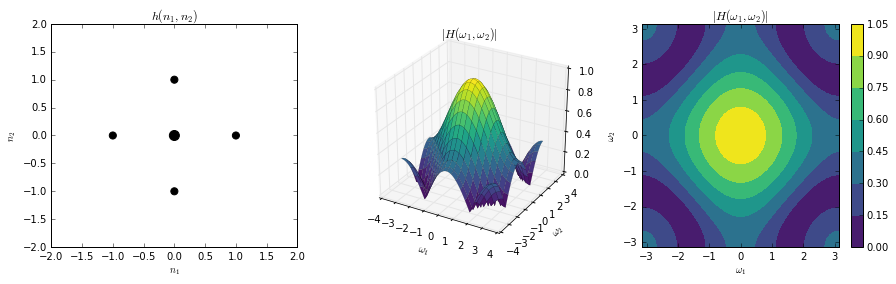

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import signal
import numpy as np
import os

# h(n1,n2)
h1 = np.array([0, -1, 0, 1, 0])
h2 = np.array([-1, 0, 0, 0, 1])
h3 = np.array([1./6, 1./6, 1./3, 1./6, 1./6])
omega1 = np.linspace(-np.pi, np.pi, 201)
omega2 = np.linspace(-np.pi, np.pi, 201)
[Omega1, Omega2] = np.meshgrid(omega1, omega2)

# H(w1,w2)
H = np.sum(np.array([h3[i]*np.exp(-1j*(Omega1*h1[i]+Omega2*h2[i])) for i in range(len(h1))]),0)

fig=plt.figure(figsize=(15, 4))
ax=plt.subplot(1, 3, 1)
ax.scatter(h1,h2, c='k',s=[x*300 for x in h3] )
plt.xlabel('$n_1$'); plt.ylabel('$n_2$')
plt.xlim([-2,2]); plt.ylim([-2,2]);
plt.title('$h(n_1,n_2)$')
# absolute values of H, np.max(H.real) ~ 1, np.max(H.imag) ~ 0, np.min(H.real) ~ 1/3, np.min(H.imag) ~ 0  
ax1 = fig.add_subplot(132, projection='3d')
surf=ax1.plot_surface(Omega1,Omega2, np.abs(H), vmin=0, vmax=1, cmap='viridis', linewidth=0.1)
plt.xlabel('$\omega_1$'); plt.ylabel('$\omega_2$')
plt.title('$|H(\omega_1,\omega_2)|$')
ax2 = fig.add_subplot(133)
surf=ax2.contourf(Omega1,Omega2, np.abs(H), vmin=0, vmax=1, cmap='viridis')
plt.xlabel('$\omega_1$'); plt.ylabel('$\omega_2$')
plt.title('$|H(\omega_1,\omega_2)|$')
plt.colorbar(surf)


The output here is a real number for this example. That's because if the signal has even symmetric, the frequency response is real. The phase is 0 or $\pm \pi$. That's a low pass filter, which leaves the origin $|H(0,0)|$ as it is, attenuates the low frequencies, but as the frequency increases, the attenuation becomes bigger.

Let's see another example:

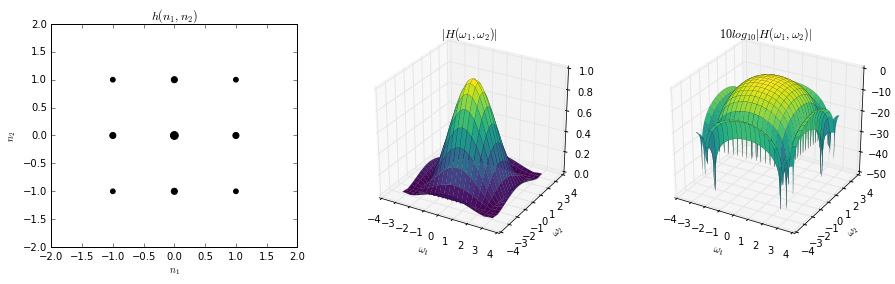

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import signal
import numpy as np

# h(n1,n2)
h1 = np.array([-1, 0, 1, -1, 0, 1, -1, 0, 1])
h2 = np.array([-1, -1, -1, 0, 0, 0, 1, 1, 1])
h3 = np.array([0.075, 0.124, 0.075, 0.124, 0.204, 0.124, 0.075, 0.124, 0.075])
omega1 = np.linspace(-np.pi, np.pi, 201)
omega2 = np.linspace(-np.pi, np.pi, 201)
[Omega1, Omega2] = np.meshgrid(omega1, omega2)

# H(w1,w2)
H = np.sum(np.array([h3[i]*np.exp(-1j*(Omega1*h1[i]+Omega2*h2[i])) for i in range(len(h1))]),0)

fig=plt.figure(figsize=(15, 4))
ax=plt.subplot(1, 3, 1)
ax.scatter(h1,h2, c='k',s=[x*300 for x in h3] )
plt.xlabel('$n_1$'); plt.ylabel('$n_2$')
plt.xlim([-2,2]); plt.ylim([-2,2]);
plt.title('$h(n_1,n_2)$')
# absolute values of H
ax1 = fig.add_subplot(132, projection='3d')
surf=ax1.plot_surface(Omega1,Omega2, np.abs(H), vmin=0, vmax=1, cmap='viridis', linewidth=0.1)
plt.xlabel('$\omega_1$'); plt.ylabel('$\omega_2$')
plt.title('$|H(\omega_1,\omega_2)|$')
ax2 = fig.add_subplot(133, projection='3d')
surf1=ax2.plot_surface(Omega1,Omega2, 10*np.log10(np.abs(H)), vmin=-50, vmax=0, cmap='viridis', linewidth=0.1)
plt.xlabel('$\omega_1$'); plt.ylabel('$\omega_2$')
plt.title('$10log_{10}|H(\omega_1,\omega_2)|$')


This is again a low pass filter. The $(0,0)$ frequency remains unchanged. Attenuates slightly the low frequencies and more the highest frequencies. Last example:

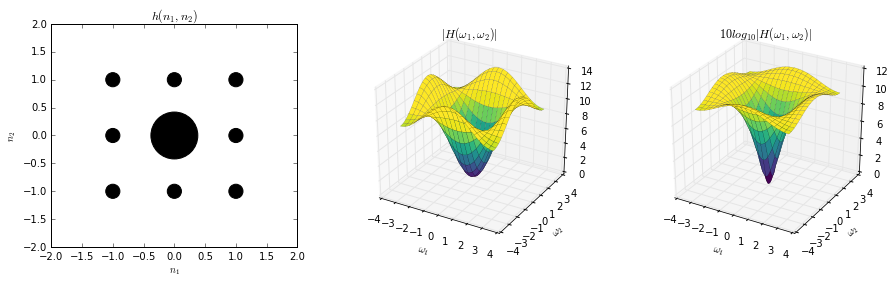

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import signal
import numpy as np

# h(n1,n2)
h1 = np.array([-1, 0, 1, -1, 0, 1, -1, 0, 1])
h2 = np.array([-1, -1, -1, 0, 0, 0, 1, 1, 1])
h3 = np.array([-1, -1, -1, -1, 9, -1, -1, -1, -1])
omega1 = np.linspace(-np.pi, np.pi, 201)
omega2 = np.linspace(-np.pi, np.pi, 201)
[Omega1, Omega2] = np.meshgrid(omega1, omega2)

# H(w1,w2)
H = np.sum(np.array([h3[i]*np.exp(-1j*(Omega1*h1[i]+Omega2*h2[i])) for i in range(len(h1))]),0)

fig=plt.figure(figsize=(15, 4))
ax=plt.subplot(1, 3, 1)
ax.scatter(h1,h2, c='k',s=[(x+2)*200 for x in h3] )
plt.xlabel('$n_1$'); plt.ylabel('$n_2$')
plt.xlim([-2,2]); plt.ylim([-2,2]);
plt.title('$h(n_1,n_2)$')
# absolute values of H
ax1 = fig.add_subplot(132, projection='3d')
surf=ax1.plot_surface(Omega1,Omega2, np.abs(H), vmin=1, vmax=10, cmap='viridis', linewidth=0.1)
plt.xlabel('$\omega_1$'); plt.ylabel('$\omega_2$')
plt.title('$|H(\omega_1,\omega_2)|$')
ax2 = fig.add_subplot(133, projection='3d')
surf1=ax2.plot_surface(Omega1,Omega2, 10*np.log10(np.abs(H)), vmin=1, vmax=10, cmap='viridis', linewidth=0.1)
plt.xlabel('$\omega_1$'); plt.ylabel('$\omega_2$')
plt.title('$10log_{10}|H(\omega_1,\omega_2)|$')


This is a high pass filter. Attenuates the low frequencies and amplifies the highest frequencies.

### Convolution Theorem

$$
y(n_1,n_2)=x(n_1,n_2)**h(n_1,n_2) \\
Y(\omega_1,\omega_2)=X(\omega_1,\omega_2)\cdot H(\omega_1,\omega_2)
$$

## Sampling

We can describe Sampling: from continuous to discrete signal, using Nyquist theorem. $T_1$ and $T_2$ are the sampling periods (sampling spacing). Suppose we have $X_a(\Omega_1,\Omega_2)$ signal. The spectrum is:

$$
X(\Omega_1T_1,\Omega_2T_2) = \frac{1}{T_1T_2} \sum\limits^{\infty}_{n_1=-\infty} \sum\limits^{\infty}_{n_2=-\infty} X_a(\Omega_1 - \frac{2\pi}{T_1}k_1,\Omega_2 - \frac{2\pi}{T_2}k_2)
$$

The spectrum is periodic because the signal is discrete. $\omega = \Omega T$. We can then have Critical Sampling, Over-Sampling (low T) and Under-Sampling (big T, the spectrum overlaps with other spectrum replicas: this is called Aliasing). So what should T be? Nyquist theorem helps here. Condition is:

$$
\frac{2\pi}{T_1}-\Omega_{N_1} \geq \Omega_{N_1} \texttt{ for any } (T,N)
$$

$$
F(\Omega_1, \Omega_2) =   \begin{cases}
    T_1 T_2 & \quad \text{for } |\Omega_1| < \frac{\pi}{T_1}, |\Omega_2| < \frac{\pi}{T_2} \\
    0 & \quad \text{ otherwise}\\
  \end{cases}
$$


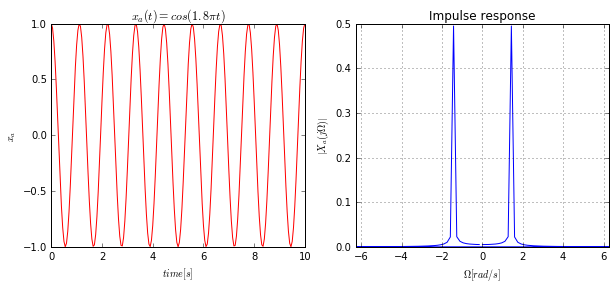

In [19]:
import matplotlib.pyplot as plt
from scipy import signal
import numpy as np

f = 0.9 # Hz
Omega = 2 * np.pi * f
samples = 201
t = np.linspace(0, 10, samples)
xa = np.cos(Omega*t)
sp = np.fft.fft(xa)/samples # norm..
freq = np.fft.fftfreq(t.shape[-1])*samples/(2*np.pi)

fig=plt.figure(figsize=(10, 4))
ax=plt.subplot(1, 2, 1)
ax.plot(t,xa, c='r')
plt.xlabel('$time [s]$'); plt.ylabel('$x_a$')
plt.title('$x_a(t)=cos(1.8\pi t)$')
ax1=plt.subplot(1, 2, 2)
plt.plot(freq, np.abs(sp.real)); plt.grid()
plt.xlim([-2*np.pi, 2*np.pi])
plt.xlabel('$\Omega [rad/s]$'); plt.ylabel('$|X_a (j \Omega)|$')
plt.title('Impulse response')


Let's apply oversampling:

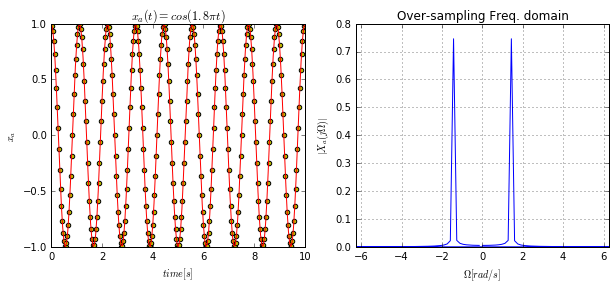

In [20]:
import matplotlib.pyplot as plt
from scipy import signal
import numpy as np

f = 0.9 # Hz
Omega = 2 * np.pi * f
samples = 201
sampless = 301
t = np.linspace(0, 10, samples)
ts= np.linspace(0, 10, sampless)
xa = np.cos(Omega*t)
xas = np.cos(Omega*ts)
sp = np.fft.fft(xas)/samples # norm..
freq = np.fft.fftfreq(ts.shape[-1])*sampless/(2*np.pi)

fig=plt.figure(figsize=(10, 4))
ax=plt.subplot(1, 2, 1)
ax.plot(t,xa, c='r')
ax.hold(True)
ax.scatter(ts,xas, c='y')
plt.xlabel('$time [s]$'); plt.ylabel('$x_a$')
plt.title('$x_a(t)=cos(1.8\pi t)$')
plt.xlim([0,10])
plt.ylim([-1, 1])
ax1=plt.subplot(1, 2, 2)
plt.plot(freq, np.abs(sp.real)); plt.grid()
plt.xlim([-2*np.pi, 2*np.pi])
plt.xlabel('$\Omega [rad/s]$'); plt.ylabel('$|X_a (j \Omega)|$')
plt.title('Over-sampling Freq. domain')


And undersampling:

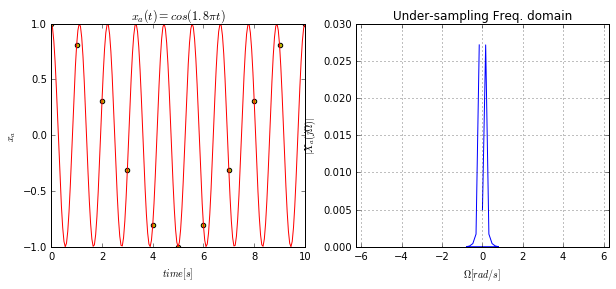

In [21]:
import matplotlib.pyplot as plt
from scipy import signal
import numpy as np

f = 0.9 # Hz
Omega = 2 * np.pi * f
samples = 201
sampless = 11
t = np.linspace(0, 10, samples)
ts= np.linspace(0, 10, sampless)
xa = np.cos(Omega*t)
xas = np.cos(Omega*ts)
sp = np.fft.fft(xas)/samples # norm..
freq = np.fft.fftfreq(ts.shape[-1])*sampless/(2*np.pi)

fig=plt.figure(figsize=(10, 4))
ax=plt.subplot(1, 2, 1)
ax.plot(t,xa, c='r')
ax.hold(True)
ax.scatter(ts,xas, c='y')
plt.xlabel('$time [s]$'); plt.ylabel('$x_a$')
plt.title('$x_a(t)=cos(1.8\pi t)$')
plt.xlim([0,10])
plt.ylim([-1, 1])
ax1=plt.subplot(1, 2, 2)
plt.plot(freq, np.abs(sp.real)); plt.grid()
plt.xlim([-2*np.pi, 2*np.pi])
plt.xlabel('$\Omega [rad/s]$'); plt.ylabel('$|X_a (j \Omega)|$')
plt.title('Under-sampling Freq. domain')


If I recontruct the signal with a low pass filter, I'll have a 0.1 Hz for a cycle.

What if I sample in the Frequency Domain? Something similar, indeed. We saw before that sampling in the spatial domain results in periodic extension of the spectrum in the frequency domain, i.e. the image should be periodically extended. And this is exactly what happens. We can see that the periodic discrete spectrum corresponds to a periodic discrete two dimensional signal. Of course, the density of sampling in the frequency domain will determine the period in the periodic extension in the spatial domain. If I under sample in the frequency domain, aliasing will take place in the spatial domain. So we see that a discreet periodic signal has a discreet periodic representation in the frequency domain. And this is, indeed the Fourier Series Representation.

## Discrete Fourier Transform

The DFT in a 2D domain positive is defined as:
$$
X(\omega_1,\omega_2) = \sum\limits^{N_1-1}_{n_1=0} \sum\limits^{N_2-1}_{n_2=0} e^{-j\omega_1n_1} e^{-j\omega_2n_2} \cdot x(n_1,n_2)
$$
The main drowback is that it is not computable ($\omega$ in continuous) in a close analytical form. We can sample the Fourier Transform $X(\omega_1,\omega_2)$, by taking one period only and therefore finding $X(k_1,k_2)$ substituting $\omega=\frac{2\pi}{N}k$. This leads to th Forward Fourier Transform, which is computable because finite. To recap, here is the Forward Fourier Transform and the Inverse Fourier Transform in a 2D sampled domain:

$$
X(k_1,k_2) = \sum^{N_1-1}_{n_1=0} \sum^{N_2-1}_{n_2=0} e^{-j \frac{2\pi}{N_1}k_1 n_1} e^{-j \frac{2\pi}{N_2}k_2 n_2} \cdot x(n_1,n_2)
$$

$$
x(n_1,n_2) = \frac{1}{N_1 N_2} \sum^{N_1-1}_{k_1=0} \sum^{N_2-1}_{k_2=0} X(k_1,k_2) e^{j \frac{2 \pi}{N_1} k_1 n_1} e^{j \frac{2\pi}{N_2} k_2 n_2} 
$$

FT and DFT share many properties. An FT linear shift becomes in DFT a circular shift. Now FFT, Fast Fourier Transform, is a fast way to compute DFT. That's done by doing Row-Column Decomposition. So if $N_1=N_2=N$ then $N^4$ goes down to $2N^3$ if I compute row-column directly and $N^2 log_2(N)$ if I use row-column FFT.

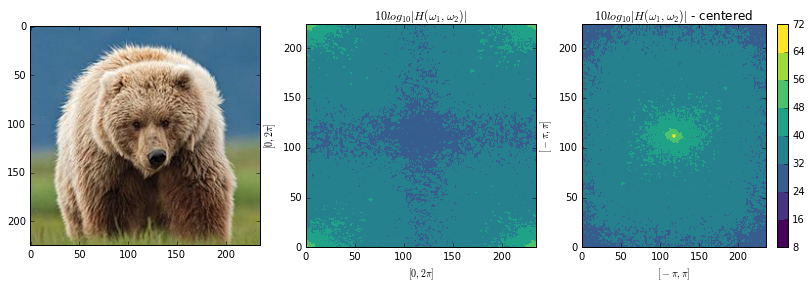

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from scipy import signal, misc, ndimage
import numpy as np

I = misc.imread(os.path.join('media','bear.png') )
Ig = misc.imread(os.path.join('media','bear.png'), mode='L')
x = np.array(range(np.size(I,0))); y = np.array(range(np.size(I,1)))
X,Y = np.meshgrid(y,x)
H = np.abs(np.fft.fft2(Ig))
Hnorm = 10*np.log10(H)
Hshift = np.fft.fftshift( Hnorm )
norm = mpl.colors.Normalize(vmin=np.min(Hnorm), vmax=np.max(Hnorm))

fig=plt.figure(figsize=(14, 4))
ax=plt.subplot(1, 3, 1)
plt.imshow(I)
# # the following plots the 3d surface
# ax1 = fig.add_subplot(142, projection='3d')
# surf = ax1.plot_surface(X,Y,Hnorm, norm=norm, cmap='viridis', linewidth=0.1)
# plt.title('$10log_{10}|H(\omega_1,\omega_2)|$')
# ax1.set_zlim([10,np.max(Hnorm)])

ax2 = fig.add_subplot(132)
cont=ax2.contourf(X,Y,Hnorm, norm=norm, cmap='viridis')
plt.xlabel('$[0,2\pi]$'); plt.ylabel('$[0,2\pi]$')
plt.title('$10log_{10}|H(\omega_1,\omega_2)|$')

ax2 = fig.add_subplot(133)
contshift=ax2.contourf(X,Y,Hshift, norm=norm, cmap='viridis')
plt.title('$10log_{10}|H(\omega_1,\omega_2)|$ - centered')
plt.xlabel('$[-\pi,\pi]$'); plt.ylabel('$[-\pi,\pi]$')
plt.colorbar(contshift)


In the plots above, $(\pi,\pi)$ is in the center of the plot. Values of $0$ and $2\pi$ are in the extremes. If we want to center the spectrum we have to multiply by $(-1)^{n_1+n_2}=e^{-j \pi (n_1 + n_2)}$. We basically applied a circular shift.


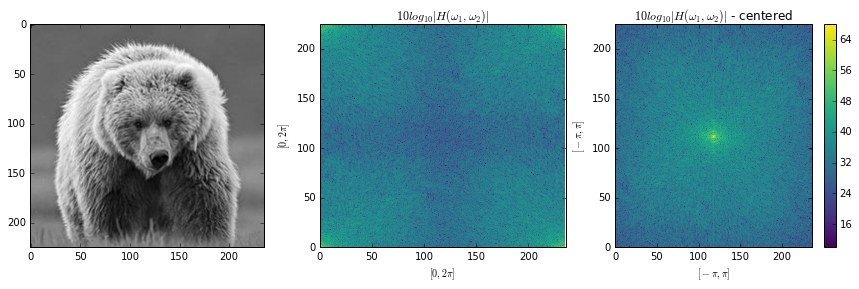

In [23]:
# use pcolormesh to avoid discretization..
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from scipy import signal, misc, ndimage
import numpy as np

I = misc.imread(os.path.join('media','bear.png') )
Ig = misc.imread(os.path.join('media','bear.png'), mode='L')
x = np.array(range(np.size(I,0))); y = np.array(range(np.size(I,1)))
X,Y = np.meshgrid(y,x)
H = np.abs(np.fft.fft2(Ig))
Hnorm = 10*np.log10(H)
Hshift = np.fft.fftshift( Hnorm )
norm = mpl.colors.Normalize(vmin=10, vmax=np.max(Hnorm))

fig=plt.figure(figsize=(15, 4))
ax=plt.subplot(1, 3, 1)
plt.imshow(Ig,cmap='gray')

ax2 = fig.add_subplot(132)
cont=ax2.pcolormesh(X,Y,Hnorm, norm=norm, cmap='viridis')
plt.xlabel('$[0,2\pi]$'); plt.ylabel('$[0,2\pi]$')
plt.title('$10log_{10}|H(\omega_1,\omega_2)|$')
plt.xlim(0, Hnorm.shape[1]), plt.ylim(0, Hnorm.shape[0])

ax2 = fig.add_subplot(133)
contshift=ax2.pcolormesh(X,Y,Hshift, norm=norm, cmap='viridis')
plt.title('$10log_{10}|H(\omega_1,\omega_2)|$ - centered')
plt.xlabel('$[-\pi,\pi]$'); plt.ylabel('$[-\pi,\pi]$')
plt.xlim(0, Hnorm.shape[1]), plt.ylim(0, Hnorm.shape[0])
plt.colorbar(contshift)

## Filtering in the Frequency Domain


With the DFT we have a computable transform that applies a $\bf {Circular Convolution}$.
$$
y_L(n_1,n_2)=x(n_1,n_2)**h(n_1,n_2) \\
Y(k_1,k_2)=X(k_1,k_2)\cdot H(k_1,k_2)
$$
If I try to go back to the spatial domain, what I get is the Circular Convolution. It's like linear convolution but all rules and conditions are circular, not linear.
$$
y(n_1,n_2)=x(n_1,n_2)*'*'h(n_1,n_2)
$$
Another way to look at it is to write $y(n_1,n_2)$ as:
$$
y(n_1,n_2)=\sum_{r_1}\sum\limits_{r_2}y_L(n_1-r_1N_1,n_2-r_2N_2)
$$
And, if there's no Aliasing, the two results will be the same.

Spatial Aliasing can affect the results in case the sampling is wrongly done and areas in the frequency domain overlap. In that case, if we apply the DFT, inverse linear convolution and inverse circular convolution would give the same result only for the non-overlapping area. 

So, if we have 8x8 image and want to convolve with a 3x3 impulse response. The result is then a 10x10 image (8+3-1=10). So, I take the original image, zero-pad the rest to make it 10x10. Say the impulse response is centered in 0. When I talk about DFTs, the range of values are from 0 to n1 minus 1, 0 to n2 minus 1. So it cannot accommodate the negative n1 n2 values of the signal. So in order to handle that I will periodically extend this three by three signal with period ten in both dimensions. 

One of the advantages of Frequency Filtering is that they can process each frequency individually, and it can be quickly evaluated.

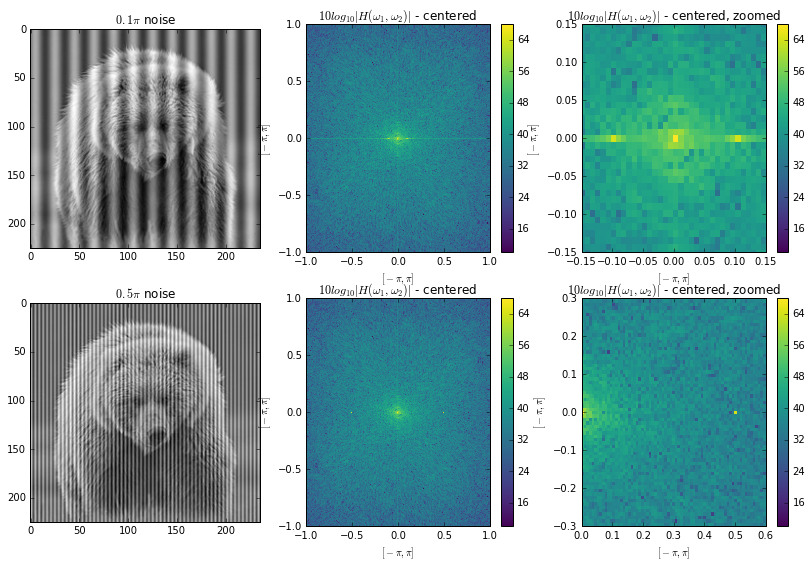

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from scipy import signal, misc, ndimage
import numpy as np

I = misc.imread(os.path.join('media','bear.png') )
Ig = misc.imread(os.path.join('media','bear.png'), mode='L')
x = np.array(range(np.size(I,0))); y = np.array(range(np.size(I,1)))
X,Y = np.meshgrid(y,x)
# plot axes for normalization, in pi
Omega1 = (X-np.size(y)/2.)/np.size(y)*2
Omega2 = (Y-np.size(x)/2.)/np.size(x)*2
# add a sinusoidal component
Ig_noise1 = Ig+np.matlib.repmat(100*np.sin(0.1*np.pi*y), x.shape[0],1)
Ig_noise2 = Ig+np.matlib.repmat(100*np.sin(0.5*np.pi*y), x.shape[0],1)

H1 = np.abs(np.fft.fft2(Ig_noise1))
Hnorm1 = 10*np.log10(H1)
Hshift1 = np.fft.fftshift( Hnorm1 )
norm1 = mpl.colors.Normalize(vmin=np.min(Hnorm1), vmax=np.max(Hnorm1))

H2 = np.abs(np.fft.fft2(Ig_noise2))
Hnorm2 = 10*np.log10(H2)
Hshift2 = np.fft.fftshift( Hnorm2 )
norm2 = mpl.colors.Normalize(vmin=np.min(Hnorm2), vmax=np.max(Hnorm2))

fig=plt.figure(figsize=(14, 9))
ax=plt.subplot(2, 3, 1)
plt.imshow(Ig_noise1,cmap='gray')
plt.title('$0.1 \pi$ noise')

ax2 = fig.add_subplot(232)
contshift1=ax2.pcolormesh(Omega1,Omega2,Hshift1, norm=norm, cmap='viridis')
plt.title('$10log_{10}|H(\omega_1,\omega_2)|$ - centered')
plt.xlabel('$[-\pi,\pi]$'); plt.ylabel('$[-\pi,\pi]$')
plt.xlim(-1,1), plt.ylim(-1,1)
plt.colorbar(contshift1)

ax3 = fig.add_subplot(233)
contshift2=ax3.pcolormesh(Omega1,Omega2,Hshift1, norm=norm, cmap='viridis')
plt.title('$10log_{10}|H(\omega_1,\omega_2)|$ - centered, zoomed')
plt.xlabel('$[-\pi,\pi]$'); plt.ylabel('$[-\pi,\pi]$')
plt.xlim([-.15, .15]), plt.ylim([-.15, .15])
plt.colorbar(contshift2)

ax4=plt.subplot(2, 3, 4)
plt.imshow(Ig_noise2,cmap='gray')
plt.title('$0.5 \pi$ noise')

ax5 = fig.add_subplot(235)
contshift3=ax5.pcolormesh(Omega1,Omega2,Hshift2, norm=norm, cmap='viridis')
plt.title('$10log_{10}|H(\omega_1,\omega_2)|$ - centered')
plt.xlabel('$[-\pi,\pi]$'); plt.ylabel('$[-\pi,\pi]$')
plt.xlim(-1,1), plt.ylim(-1,1)
plt.colorbar(contshift3)

ax6 = fig.add_subplot(236)
contshift4=ax6.pcolormesh(Omega1,Omega2,Hshift2, norm=norm, cmap='viridis')
plt.title('$10log_{10}|H(\omega_1,\omega_2)|$ - centered, zoomed')
plt.xlabel('$[-\pi,\pi]$'); plt.ylabel('$[-\pi,\pi]$')
plt.xlim([0, .6]), plt.ylim([-.3, .3])
plt.colorbar(contshift4)


For the example above, we will need to apply a Filter to get rid of that frequency.

## Change of Sampling Rate

We can up-Sample or down-Sample. We do it in the Discrete Frequency Domain. Aliasing can be cured with Low Pass Filters. Up-Sampling can be done in Frequency Domain. With Downsampling (for example by deleting any other row/column), I would get Aliasing (jagged edges in the spatial domain), therefore I should low pass filter the image BEFORE down-sampling, and doing it with proper down-sampling factor, so that the spectra do not overlap. With Up-Sampling (for example by adding zeros rows and columns for any other row/column)... I'm just interested in the base band of the spectrum, and I do it by using Low Pass Filter for the band of interest. In the Spatial domain I'm convolving the image with the filter.

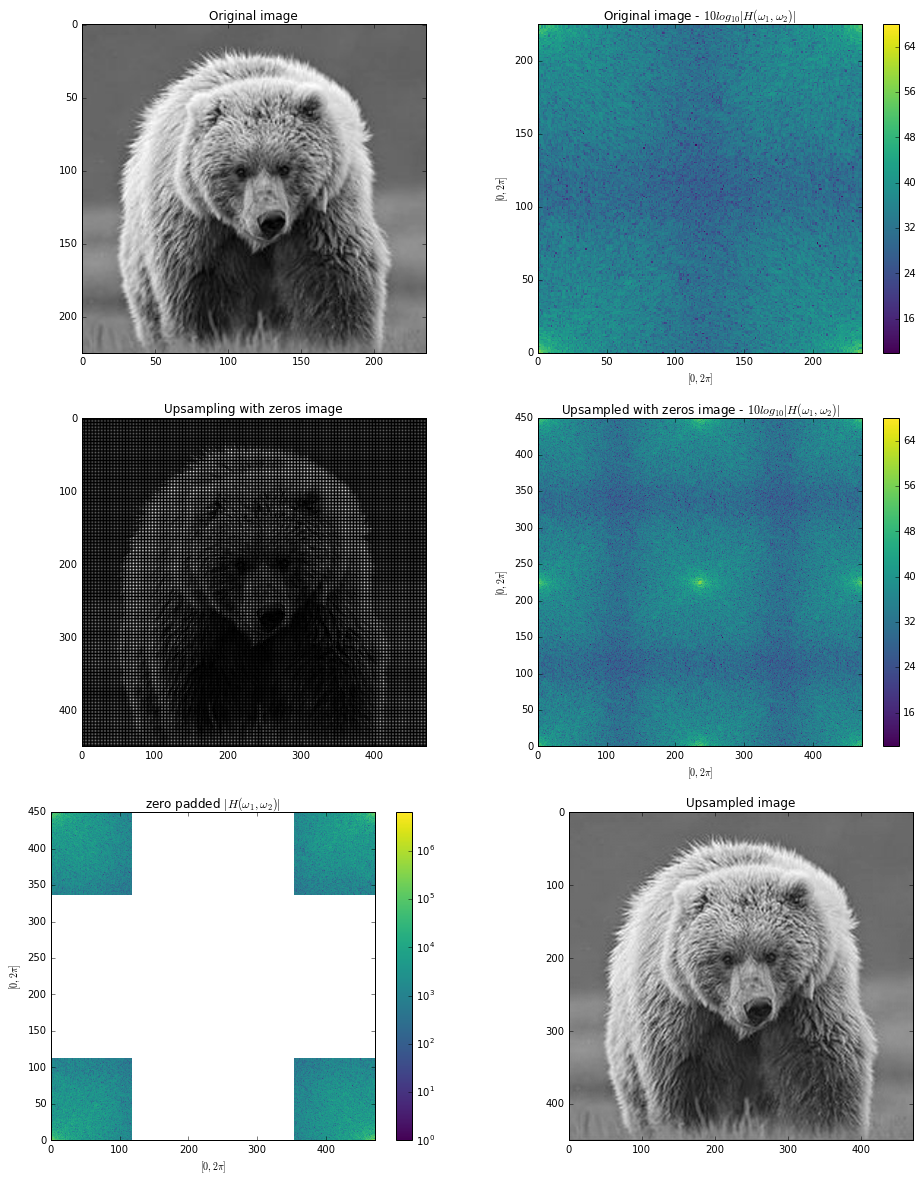

In [26]:
# use pcolormesh to avoid discretization..
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from scipy import signal, misc, ndimage
import numpy as np

I = misc.imread(os.path.join('media','bear.png') )
Ig = misc.imread(os.path.join('media','bear.png'), mode='L')
x = np.array(range(np.size(I,0))); y = np.array(range(np.size(I,1)))
X,Y = np.meshgrid(y,x)
H = np.abs(np.fft.fft2(Ig))
Hnorm = 10*np.log10(H)
norm = mpl.colors.Normalize(vmin=10, vmax=np.max(Hnorm))

# upsampling...
Igup = np.zeros((2*np.size(Ig,0),2*np.size(Ig,1)))
for i in range(np.size(Ig,0)):
    for j in range(np.size(Ig,1)):
        Igup[np.multiply(i,2.).astype(int),np.multiply(j,2.).astype(int)] = Ig[i,j]
xup = np.array(range(np.size(Igup,0))); yup = np.array(range(np.size(Igup,1)))
Xup,Yup = np.meshgrid(yup,xup)
Hupnoabs = np.fft.fft2(Igup)
Hnormup = 10*np.log10(Hupnoabs)
normup = mpl.colors.Normalize(vmin=10, vmax=np.max(Hnormup))

# zeropad in the frequency domain
Hup_0 = Hupnoabs.copy()
# padding zeros means padding one in log scale
Hup_0[:, int(Hupnoabs.shape[1]/4):int(Hupnoabs.shape[1]/4+Hupnoabs.shape[1]/4.*2)] = 0
Hup_0[int(Hupnoabs.shape[0]/4):int(Hupnoabs.shape[0]/4+Hupnoabs.shape[0]/4.*2),:] = 0

# for plotting purposes only
normup_0 = mpl.colors.LogNorm(vmin=1, vmax=np.max(np.abs(Hup_0)))

# apply inverse fft
Igup_0 = np.real((np.fft.ifft2(Hup_0)))
# normalize wrt to old image, not really needed.
# Igup_0norm = (np.max(Ig) - (((np.max(Ig) - np.min(Ig)) * (np.max(Igup_0) - Igup_0)) / (np.max(Igup_0) - np.min(Igup_0)))).astype(int)

fig=plt.figure(figsize=(16, 20))
ax=plt.subplot(3, 2, 1)
plt.imshow(Ig,cmap='gray')
plt.title('Original image')

ax2 = fig.add_subplot(322)
cont2=ax2.pcolormesh(X,Y,Hnorm, norm=norm, cmap='viridis')
plt.xlabel('$[0,2\pi]$'); plt.ylabel('$[0,2\pi]$')
plt.title('Original image - $10log_{10}|H(\omega_1,\omega_2)|$')
plt.xlim(0, Hnorm.shape[1]), plt.ylim(0, Hnorm.shape[0])
plt.colorbar(cont)

ax3=plt.subplot(3, 2, 3)
plt.imshow(Igup,cmap='gray')
plt.title('Upsampling with zeros image')

ax4 = fig.add_subplot(324)
cont4=ax4.pcolormesh(Xup,Yup,Hnormup, norm=normup, cmap='viridis')
plt.xlabel('$[0,2\pi]$'); plt.ylabel('$[0,2\pi]$')
plt.title('Upsampled with zeros image - $10log_{10}|H(\omega_1,\omega_2)|$')
plt.xlim(0, Hnormup.shape[1]), plt.ylim(0, Hnormup.shape[0])
plt.colorbar(cont4)

ax5 = fig.add_subplot(325)
cont5=ax5.pcolormesh(Xup,Yup,np.abs(Hup_0), norm=normup_0, cmap='viridis')
plt.xlabel('$[0,2\pi]$'); plt.ylabel('$[0,2\pi]$')
plt.title('zero padded $|H(\omega_1,\omega_2)|$')
plt.xlim(0, Hnormup.shape[1]), plt.ylim(0, Hnormup.shape[0])
plt.colorbar(cont5)

ax5=plt.subplot(3, 2, 6)
plt.imshow(Igup_0,cmap='gray')
plt.title('Upsampled image')


To do that, I could also do convolution of the image with a Gaussian Filter, directly in the Spatial Domain.